In [5]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [6]:
df1 = pd.read_csv('Admission_Predict_Ver1.1.csv')
df2 = pd.read_csv("Admission_Predict.csv")


df = pd.concat([df1,df2],axis=0,sort=False)
df.shape

(900, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


# data_cleaning

In [9]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

In [10]:
#sns.pairplot(df,diag_kind='kde')

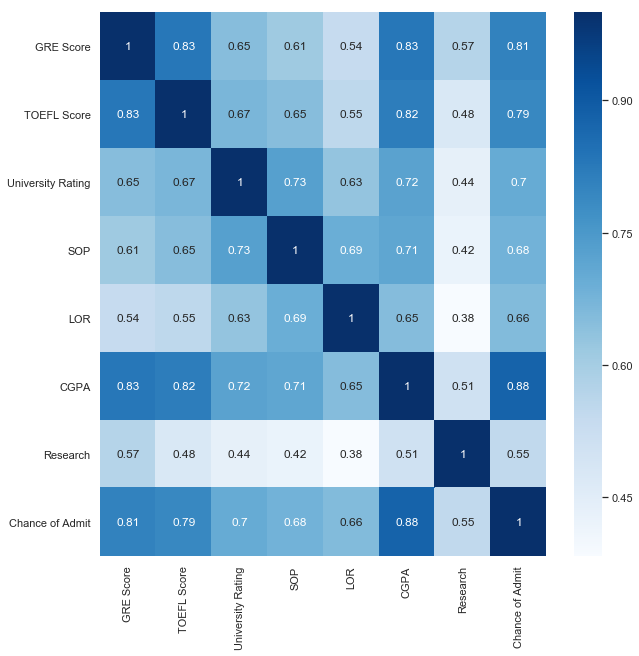

In [11]:
#feature selection using correlatin matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# CGPA vs Chance of Admit

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

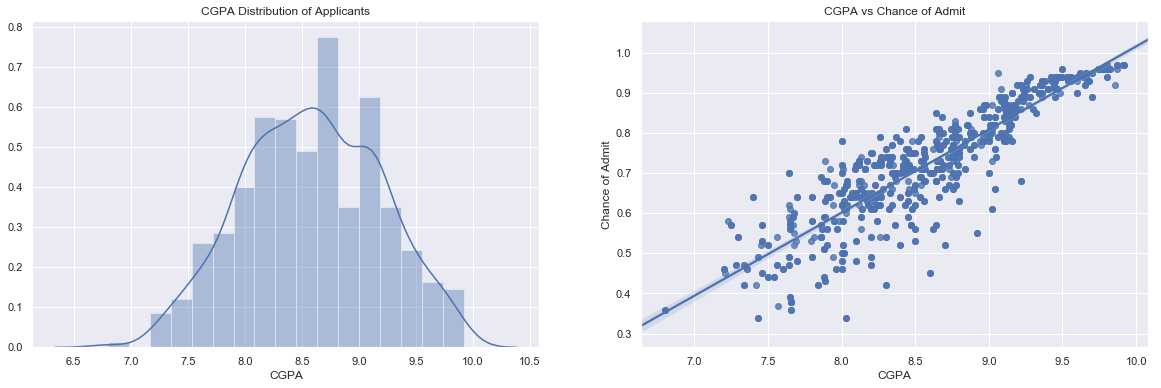

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

# GRE Scores vs Chance of Admit

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

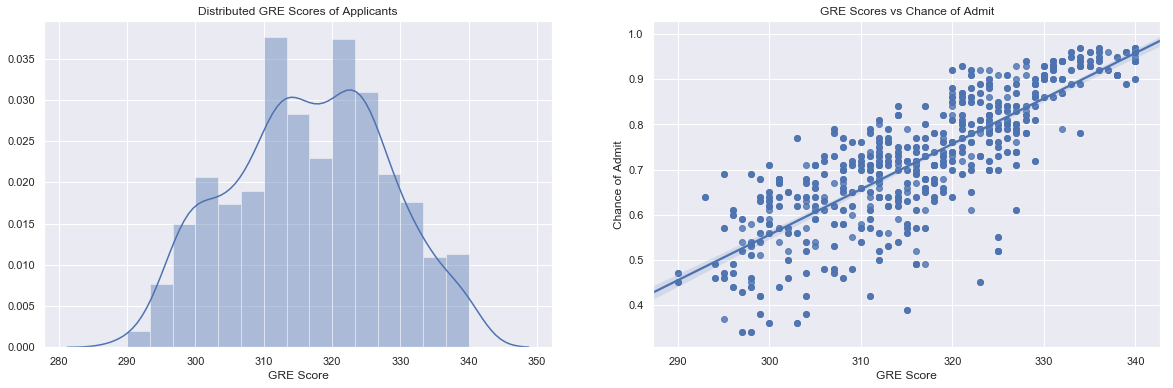

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

# TOEFL Scores vs Chance of Admit

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

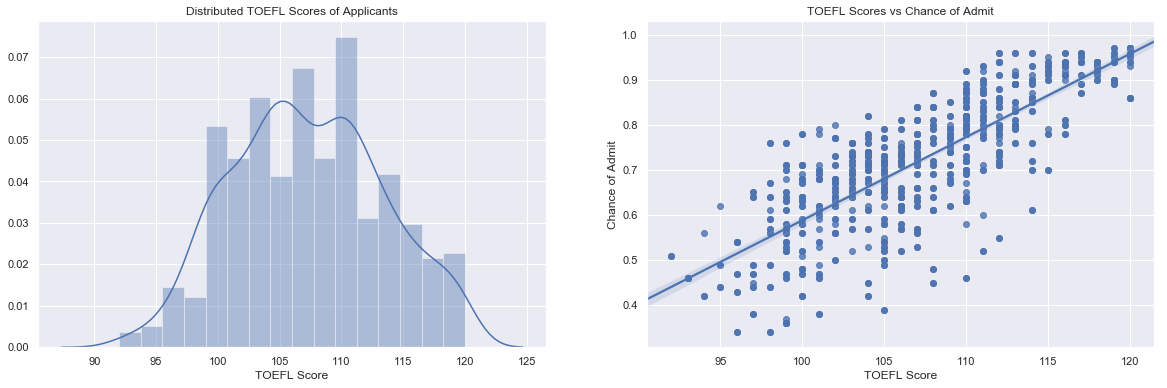

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            900 non-null int64
TOEFL Score          900 non-null int64
University Rating    900 non-null int64
SOP                  900 non-null float64
LOR                  900 non-null float64
CGPA                 900 non-null float64
Research             900 non-null int64
Chance of Admit      900 non-null float64
dtypes: float64(4), int64(4)
memory usage: 63.3 KB


# preparing data

In [16]:
y = df['Chance of Admit']
X = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  re

# logistic regression

In [18]:
#mean_chance = df['Chance of Admit'].mean()

In [19]:
y_train_int = (y_train > 0.72).astype(int)
y_test_int = (y_test > 0.72).astype(int)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train_int)
y_predict = logreg.predict(X_test_std)
logreg_score = (logreg.score(X_test_std, y_test_int))*100
logreg_score

c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


90.37037037037037

In [21]:
from sklearn.metrics import confusion_matrix
cm_logres = confusion_matrix(y_test_int,logreg.predict(X_test_std))
cm_logres

array([[123,  11],
       [ 15, 121]], dtype=int64)

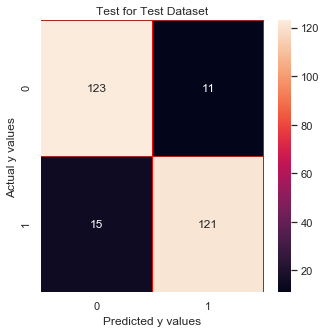

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_logres,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

# decission tree

In [23]:
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
dec_tree.fit(X_train_std, y_train_int)
y_predict = dec_tree.predict(X_test_std)
dec_tree_score = (dec_tree.score(X_test_std, y_test_int))*100
dec_tree_score

90.37037037037037

In [24]:
cm_dec_tree = confusion_matrix(y_test_int,dec_tree.predict(X_test_std))
cm_dec_tree

array([[118,  16],
       [ 10, 126]], dtype=int64)

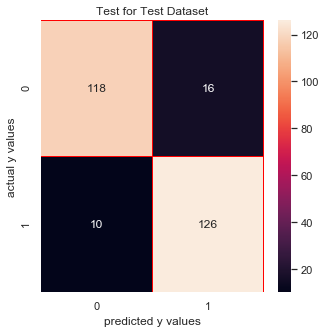

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dec_tree,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("actual y values")
plt.show()

# random forest

In [26]:
forest = RandomForestClassifier(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train_std, y_train_int)
y_predict = forest.predict(X_test_std)
forest_score = (forest.score(X_test_std, y_test_int))*100
forest_score

92.22222222222223

In [28]:
cm_forest = confusion_matrix(y_test_int,forest.predict(X_test_std))
cm_forest

array([[126,   8],
       [ 13, 123]], dtype=int64)

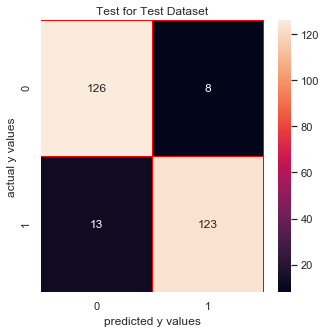

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_forest,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("actual y values")
plt.show()

# comparing scores

Text(0, 0.5, 'Accuracy')

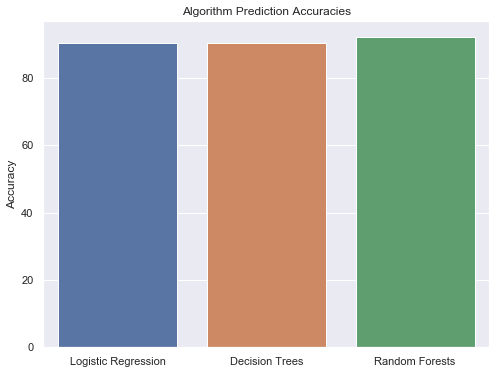

In [30]:
Methods = ['Logistic Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([logreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In [31]:
maxi = max(logreg_score, dec_tree_score, forest_score)
if(maxi==logreg_score):
    print("Best model is Logistic regression for my given dataset")
    print(logreg_score)
elif(maxi==dec_tree_score):
    print("Best model is Decission tree for my given dataset")
    print(dec_tree_score)
else:
    print("Best model is Random forest for my given dataset")
    print(forest_score)

Best model is Random forest for my given dataset
92.22222222222223


In [32]:
acc = []

In [33]:
##Grid search for random forest
from sklearn.model_selection import cross_val_score
param_grid = [{'n_estimators':[50,100,200],
               'max_depth':[1,2,3,4,5,6,7,None]}]
gs_rf = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state = 23),
                     param_grid,scoring = 'accuracy',cv = 2, n_jobs = -1)

scores = cross_val_score(gs_rf, X_train_std, y_train_int, scoring='accuracy', cv=2,
                         n_jobs=-1)
mean = np.mean(scores)
acc.append(mean)
print('Random Forest: %.3f and %.3f' % (mean, np.std(scores)))



Random Forest: 0.881 and 0.011


In [34]:
##Grid search for decision tree

gs_dt = GridSearchCV(DecisionTreeClassifier(random_state = 23),
                     param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                     scoring = 'accuracy',cv =2, n_jobs = -1)

scores = cross_val_score(gs_dt, X_train_std, y_train_int, scoring='accuracy', cv=2,
                         n_jobs=-1)
mean = np.mean(scores)
acc.append(mean)
print('DecisionTreeClassifier: %.3f and %.3f'% (mean, np.std(scores)))



DecisionTreeClassifier: 0.848 and 0.010


In [35]:
##Grid search for logistic regression
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gs_lr = GridSearchCV(LogisticRegression(n_jobs = -1, random_state = 23),
                     param_grid = [{'C': c_range}],
                     scoring = 'accuracy', cv = 2, n_jobs = -1)
scores = cross_val_score(gs_lr, X_train_std, y_train_int, scoring='accuracy', cv=2,
                         n_jobs=-1)
mean = np.mean(scores)
acc.append(mean)
print('LogisticRegression: %.3f and %.3f' % (mean, np.std(scores)))

LogisticRegression: 0.875 and 0.002


In [36]:
best = np.argmax(acc)

if(best == 0):
    clf = gs_rf.fit(X_train_std,y_train_int)
    clf = gs_rf.best_estimator_
    print("Random Forest is best estimator")
elif(best == 1):
    clf = gs_dt.fit(X_train_std,y_train_int)
    clf = gs_dt.best_estimator_
    print("Decision Tree is best estimator")
else:
    clf = gs_lr.fit(X_train_std,y_train_int)
    clf = gs_lr.best_estimator_
    print("Logistic regression is best estimator")
#pred = clf.predict(X_train_std)
print('Test accuracy:%3f' %clf.score(X_test_std,y_test_int))

Random Forest is best estimator
Test accuracy:0.955556


In [38]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

y = df['Chance of Admit']
X = df.drop(columns = {'Chance of Admit'})
X=X.iloc[:,:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_mms = scaler.fit_transform(X)

y_train_int = (y_train > 0.72).astype(int)
y_test_int = (y_test > 0.72).astype(int)

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)

y=np.array(y)

for train_index, test_index in cv.split(X_mms):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    
    #print(train_index[0],train_index[-1])
    #print(X[90:230,:])
    #print(np.shape(y))
    X_train, X_test, y_train, y_test = X_mss[train_index], X_mss[test_index], y[train_index], y[test_index]
    #print(np.shape(X_train))
    #print(np.shape(y_train))
    
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

print('\nscore is: %.3f ' % (np.mean(scores)))

Train Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 

c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809] 

Test Index:  [810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827
 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845
 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899]

score is: 0.696 


c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tarun singh mahar\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Generate the class/group data

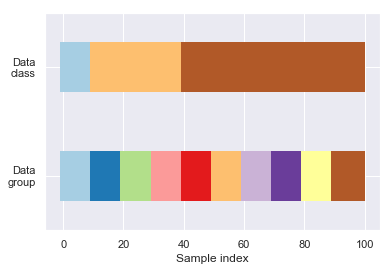

In [44]:

from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 10

n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

###############################################################################
# Define a function to visualize cross-validation behavior
# --------------------------------------------------------
#
# We'll define a function that lets us visualize the behavior of each
# cross-validation object. We'll perform 4 splits of the data. On each
# split, we'll visualize the indices chosen for the training set
# (in blue) and the test set (in red).


def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax



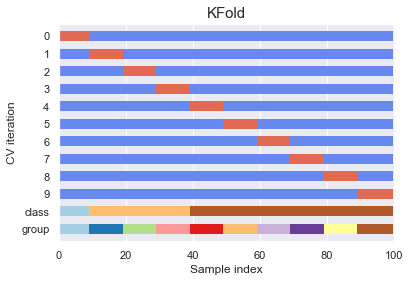

In [49]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                      GroupKFold, StratifiedShuffleSplit)
fig, ax = plt.subplots()
#cv = StratifiedKFold(n_splits=10)
cv = KFold(n_splits=10)
plot_cv_indices(cv, X, y, groups, ax, n_splits)